In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [24]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print(X_full.shape)
print(Y.shape)
print(boston_dataset.DESCR)

(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    

In [22]:
df = pd.DataFrame(X_full, columns= boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
# X_full = boston_dataset.data
# Y = boston_dataset.target
# selector = SelectKBest(f_regression, k = 1)
# selector.fit(X_full, Y)
# X = X_full[:, selector.get_support()]

In [4]:
selector = SelectKBest(f_regression, k = 1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print(X.shape)

(506, 1)


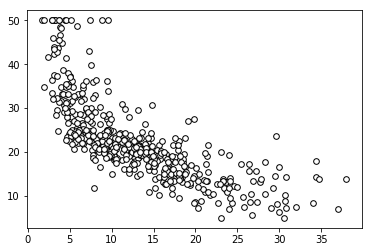

In [5]:
def plot_scatter(X, Y, R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='white',edgecolors='black')
    if R is not None:
        plt.scatter(X, R, color='r', linewidth=0.5)
    plt.show()
plot_scatter(X,Y)

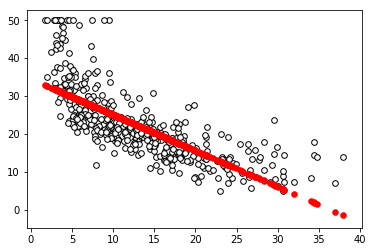

In [6]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


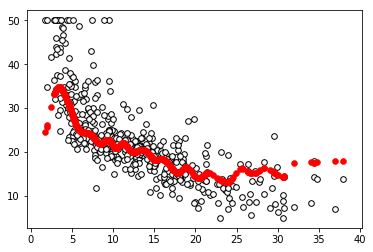

In [7]:
regressor = SVR().fit(X, Y) #metoda wektorow nosnych, support vector machine)
plot_scatter(X, Y, regressor.predict(X))

C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


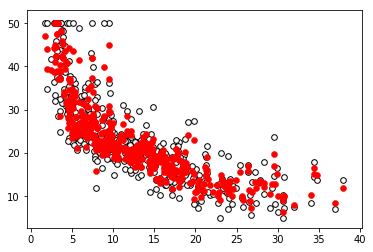

In [8]:
regressor = RandomForestRegressor().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)
# print(iris.data)
print(iris.data.shape)
print(iris.feature_names)
print(iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
print(type(iris.data), type(iris.target), iris.target.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (150,)


In [11]:
import pandas as pd
import numpy as np
colors = list()
palette = {0: "red", 1 : "green", 2: "blue"}

In [12]:
for c in np.nditer(iris.target): 
    colors.append(palette[int(c)])
dataframe = pd.DataFrame(iris.data, columns= iris.feature_names)

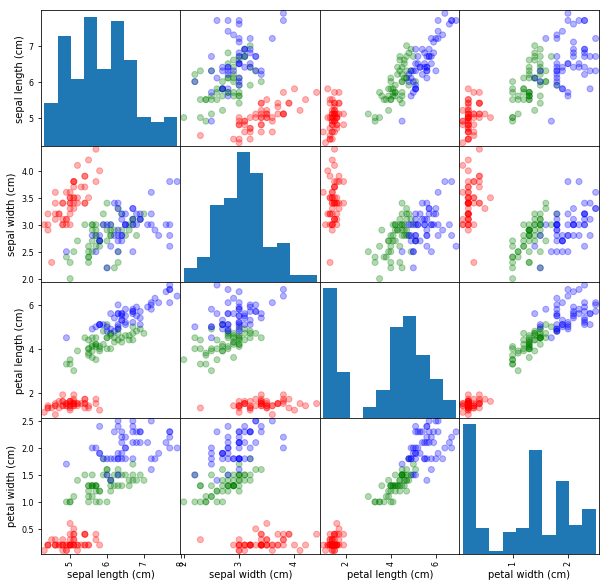

In [13]:
sc = pd.scatter_matrix(dataframe, alpha = 0.3, figsize=(10,10),diagonal='hist', c=colors, marker='o', grid=True)

C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


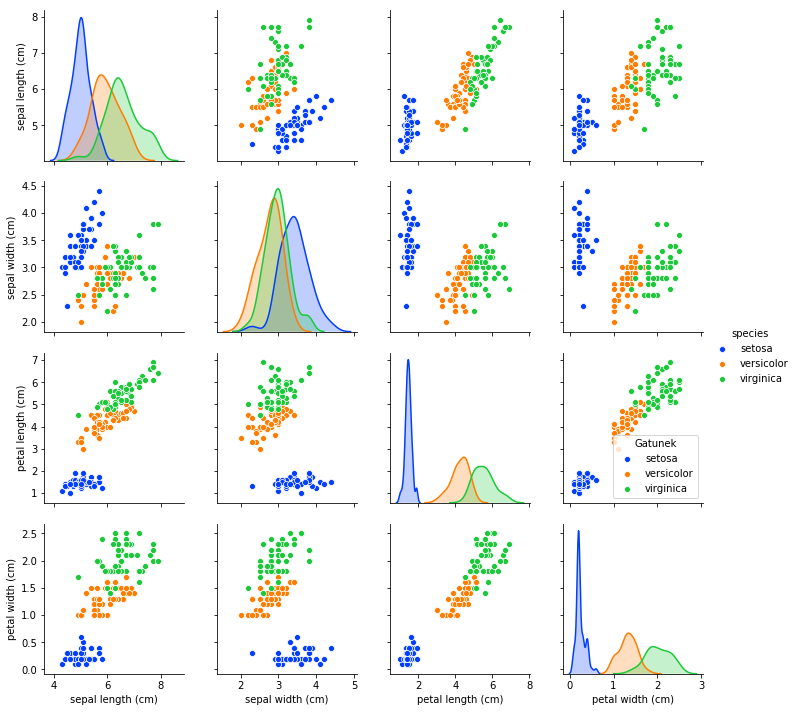

In [16]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Tworzenie wykresu scatter z użyciem seaborn
sns.pairplot(iris_df, hue='species', palette='bright')
plt.legend(title='Gatunek')
# plt.show()

In [15]:
from sklearn.datasets import fetch_mldata
earthquakes = fetch_mldata('global-earthquakes')
print(earthquakes.data)
print(earthquakes.data.shape)

C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Oprogramowanie\Anaconda3\envs\python_pnd\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


HTTPError: HTTP Error 503: Service Unavailable

In [18]:
import urllib
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
a2a = urllib.request.urlopen(target_page)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:719)>

In [ ]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file(a2a)
print (X_train.shape, y_train.shape)


In [19]:
X

array([[  4.98],
       [  9.14],
       [  4.03],
       [  2.94],
       [  5.33],
       [  5.21],
       [ 12.43],
       [ 19.15],
       [ 29.93],
       [ 17.1 ],
       [ 20.45],
       [ 13.27],
       [ 15.71],
       [  8.26],
       [ 10.26],
       [  8.47],
       [  6.58],
       [ 14.67],
       [ 11.69],
       [ 11.28],
       [ 21.02],
       [ 13.83],
       [ 18.72],
       [ 19.88],
       [ 16.3 ],
       [ 16.51],
       [ 14.81],
       [ 17.28],
       [ 12.8 ],
       [ 11.98],
       [ 22.6 ],
       [ 13.04],
       [ 27.71],
       [ 18.35],
       [ 20.34],
       [  9.68],
       [ 11.41],
       [  8.77],
       [ 10.13],
       [  4.32],
       [  1.98],
       [  4.84],
       [  5.81],
       [  7.44],
       [  9.55],
       [ 10.21],
       [ 14.15],
       [ 18.8 ],
       [ 30.81],
       [ 16.2 ],
       [ 13.45],
       [  9.43],
       [  5.28],
       [  8.43],
       [ 14.8 ],
       [  4.81],
       [  5.77],
       [  3.95],
       [  6.86